In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

https://github.com/udacity/deep-learning-v2-pytorch.git

**Read** **Data**

In [0]:
url = "https://raw.githubusercontent.com/uttejh/DeepLearning_PyTorch/master/data.csv"
data = pd.read_csv(url, header=None)
def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

**Plot** **Data**

In [0]:
x= np.array(data[[0,1]])
y=np.array(data[2])

In [0]:
def plot_points(x, y):
  ones = x[np.argwhere(y == 1)]
  zeros = x[np.argwhere(y == 0)]
  plt.scatter([s[0][0] for s in ones], [s[0][1] for s in ones], 25, color = 'red', edgecolor = 'k')
  plt.scatter([s[0][0] for s in zeros], [s[0][1] for s in zeros], s = 25, color = 'blue', edgecolor = 'k')

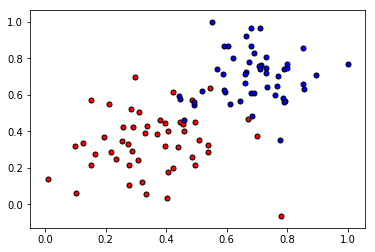

In [36]:
plot_points(x,y)

In [0]:
# Activation (sigmoid) function
def sigmoid(x):
    num = 1
    den = 1 + np.exp(-x)
    
    return num/den

# Output (prediction) formula
def output_formula(features, weights, bias):
    ybar = weights[0]*features[0] + weights[1]*features[1] + bias
    
    return sigmoid(ybar)

# Error (log-loss) formula
def error_formula(y, output):
    err = -y*np.log(output) - (1-y)*np.log(1-output)
    
    return err

# Gradient descent step
def update_weights(x, y, output, weights, b, learnrate):
    
    weights[0] = weights[0] + learnrate*(y-output)*x[0]
    weights[1] = weights[1] + learnrate*(y-output)*x[1]
    
    b = b + learnrate*(y-output)
    
    return weights, b

In [0]:
np.random.seed(44)

epochs = 100
learnrate = 0.01


In [0]:
def train(features, targets, epochs, learnrate, graph_lines=False):
  errors = []
  
  num_records, num_features = features.shape
  
  last_loss = None
  
  weights = np.random.normal(scale = 1/2**.5, size = num_features)
  bias=0
  for e in range(epochs):
    for x,y in zip(features, targets):
      output = output_formula(x, weights, bias)
      error = error_formula(y, output)
      
      weights, bias = update_weights(x, y, output, weights, bias, learnrate)
      
#       out = output_formula(features, weights, bias)
#       loss = np.mean(error_formula(targets, out))
#       errors.append(loss)
#       if e % (epochs / 10) == 0:
#           print("\n========== Epoch", e,"==========")
#           if last_loss and last_loss < loss:
#               print("Train loss: ", loss, "  WARNING - Loss Increasing")
#           else:
#               print("Train loss: ", loss)
#           last_loss = loss
#           predictions = out > 0.5
#           accuracy = np.mean(predictions == targets)
#           print("Accuracy: ", accuracy)
#       if graph_lines and e % (epochs / 100) == 0:
#           display(-weights[0]/weights[1], -bias/weights[1])
     
  # Plotting the solution boundary
  plt.title("Solution boundary")
  display(-weights[0]/weights[1], -bias/weights[1], 'black')

  # Plotting the data
  plot_points(features, targets)
  plt.show()

  # Plotting the error
  plt.title("Error Plot")
  plt.xlabel('Number of epochs')
  plt.ylabel('Error')
  plt.plot(errors)
  plt.show()

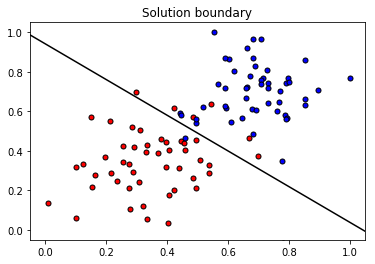

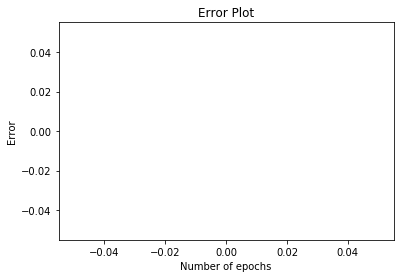

In [44]:
train(x, y, epochs, learnrate, True)